In [2]:
pip install urllib3 pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import urllib.request
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt


In [4]:
def url_to_numpy(url):
    # Download the image using urllib
    image_data = urllib.request.urlopen(url).read()

    # Convert the image data to a PIL Image object
    image = Image.open(io.BytesIO(image_data))

    # Convert the PIL Image object to a numpy array
    numpy_array = np.array(image)

    return numpy_array

In [5]:
def display_image(image_array):
    # Create a new figure and plot the image
    plt.figure()
    plt.imshow(image_array)
    plt.axis('off')  # Turn off axis labels

    # Display the plot
    plt.show()

In [6]:
image_url = "https://cdn.dribbble.com/userupload/2922073/file/original-b21092fcf23786b73678af3b3927d6cf.jpg?resize=400x0"

In [7]:
image_array = url_to_numpy(image_url)

In [8]:
print(image_array.shape)

(300, 400, 3)


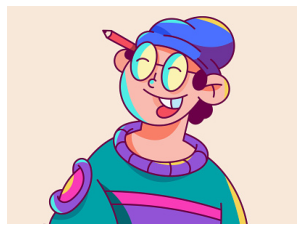

In [9]:
display_image(image_array)

In [10]:
def remove_red(image_array):
    # Set red channel values to zero
    image_array[:, :, 0] = 0  # Index 0 represents red channel

    return image_array

In [11]:
modified_image_array = remove_red(image_array)

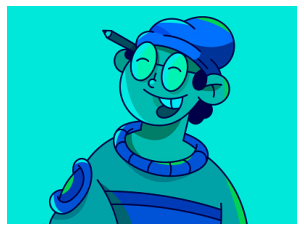

In [12]:
display_image(modified_image_array)


In [14]:
def make_half_bw(image_array):
    # Calculate the width of the image
    width = image_array.shape[1]

    # Split the image array into two halves
    half_width = width // 2
    left_half = image_array[:, :half_width, :]
    right_half = image_array[:, half_width:, :]

    # Convert the left half of the image to grayscale
    left_half_gray = np.dot(left_half[..., :3], [0.2989, 0.5870, 0.1140])

    # Create an empty array with the same shape as the original image array
    modified_image_array = np.empty_like(image_array)

    # Combine the modified halves back into the image array
    modified_image_array[:, :half_width, :] = np.expand_dims(left_half_gray, axis=2)
    modified_image_array[:, half_width:, :] = right_half

    return modified_image_array

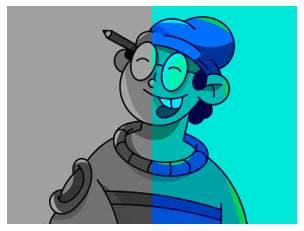

In [15]:
# Modify the image array
modified_image_array = make_half_bw(image_array)

# Display modified image
display_image(modified_image_array)

In [16]:
def merge_halves(image_array):
    # Calculate the width of the image
    width = image_array.shape[1]

    # Split the image array into two halves
    half_width = width // 2
    left_half = image_array[:, :half_width, :]
    right_half = image_array[:, half_width:, :]

    # Rotate the halves horizontally
    left_half_rotated = np.fliplr(left_half)
    right_half_rotated = np.flip(right_half)

    # Merge the rotated halves into a new image
    merged_image_array = np.concatenate((right_half_rotated, left_half_rotated), axis=1)

    return merged_image_array

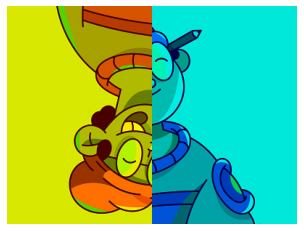

In [17]:
merged_image_array = merge_halves(image_array)
# Display merged image
display_image(merged_image_array)

In [24]:
def display_black_lines(image_array):
    # Convert the image to grayscale
    grayscale_array = np.dot(image_array[..., :3], [0.2989, 0.5870, 0.1140])

    # Apply a threshold to extract the black lines
    threshold = 10
    binary_array = (grayscale_array < threshold).astype(np.uint8)

    # Display the binary image with black lines
    plt.imshow(binary_array, cmap='gray')
    plt.axis('off')
    plt.show()

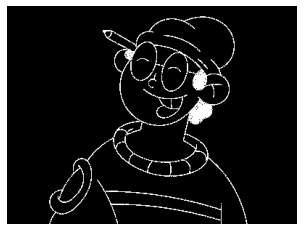

In [25]:
display_black_lines(image_array)

In [26]:
from ipywidgets import interact, fixed


In [27]:
def display_black_lines(image_array, threshold):
    # Convert the image to grayscale
    grayscale_array = np.dot(image_array[..., :3], [0.2989, 0.5870, 0.1140])

    # Apply the threshold to extract the black lines
    binary_array = (grayscale_array < threshold).astype(np.uint8)
 


    # Display the binary image with black lines
    plt.imshow(binary_array, cmap='gray')
    plt.axis('off')
    plt.show()

In [28]:
# Set the initial threshold value
initial_threshold = 128

# Create an interactive slider for threshold adjustment
interact(display_black_lines, image_array=fixed(image_array), threshold=(0, 255, 1), continuous_update=False)

interactive(children=(IntSlider(value=127, description='threshold', max=255), Output()), _dom_classes=('widget…

<function __main__.display_black_lines(image_array, threshold)>